In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbn

import warnings

warnings.filterwarnings('ignore')

In [4]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv')

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
male_passengers = titanic_data.groupby('Sex')['Sex'].count()
print(male_passengers)

Sex
female    314
male      577
Name: Sex, dtype: int64


In [11]:
survived = len(titanic_data.loc[(titanic_data['Survived'] == 1)]['Survived'])
total_passengers = len(titanic_data)

survived_prop = survived / total_passengers

print(survived_prop)

0.3838383838383838


In [12]:
fare_median = titanic_data['Fare'].median()
print(fare_median)

14.4542


In [13]:
survived_male = len(titanic_data.loc[(titanic_data['Survived'] == 1) & (titanic_data['Sex'] == 'male')]['Survived'])
survived_female = len(titanic_data.loc[(titanic_data['Survived'] == 1) & (titanic_data['Sex'] == 'female')]['Survived'])
print("m: {} vs f: {}".format(survived_male, survived_female))

m: 109 vs f: 233


In [15]:
class_survivors = titanic_data.loc[(titanic_data['Survived'] == 1)].groupby('Pclass')['Pclass'].count()
print(class_survivors)

Pclass
1    136
2     87
3    119
Name: Pclass, dtype: int64


In [19]:
child_survivors = titanic_data.loc[(titanic_data['Survived'] == 1) & (titanic_data['Age'] <= 18.)].dropna().groupby('Age')['Age'].count().sum()
print(child_survivors)

20


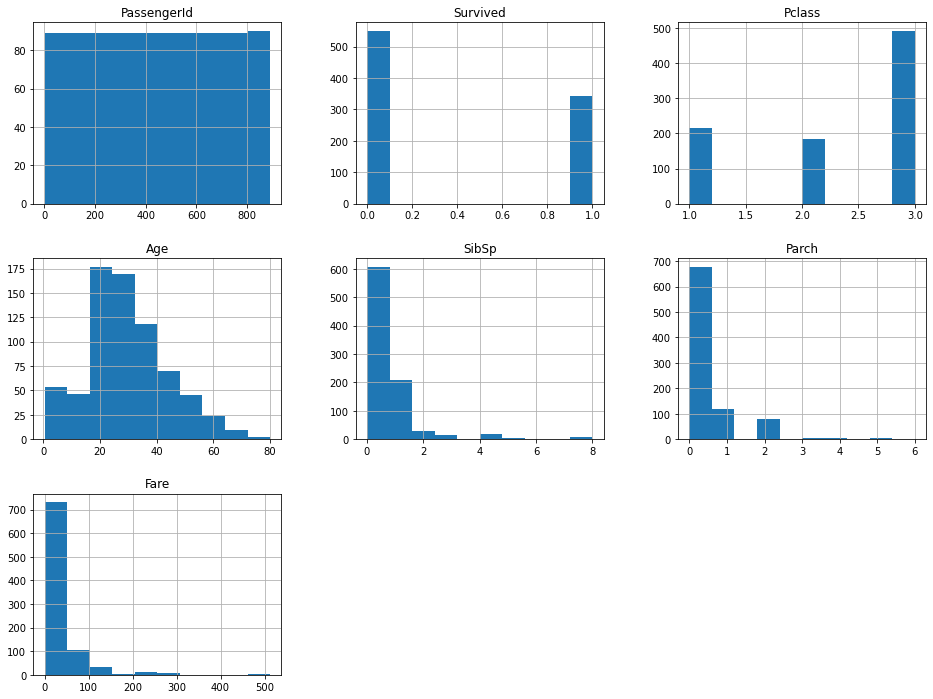

In [40]:
titanic_data.hist(bins=10, figsize=(16,12))
plt.show()

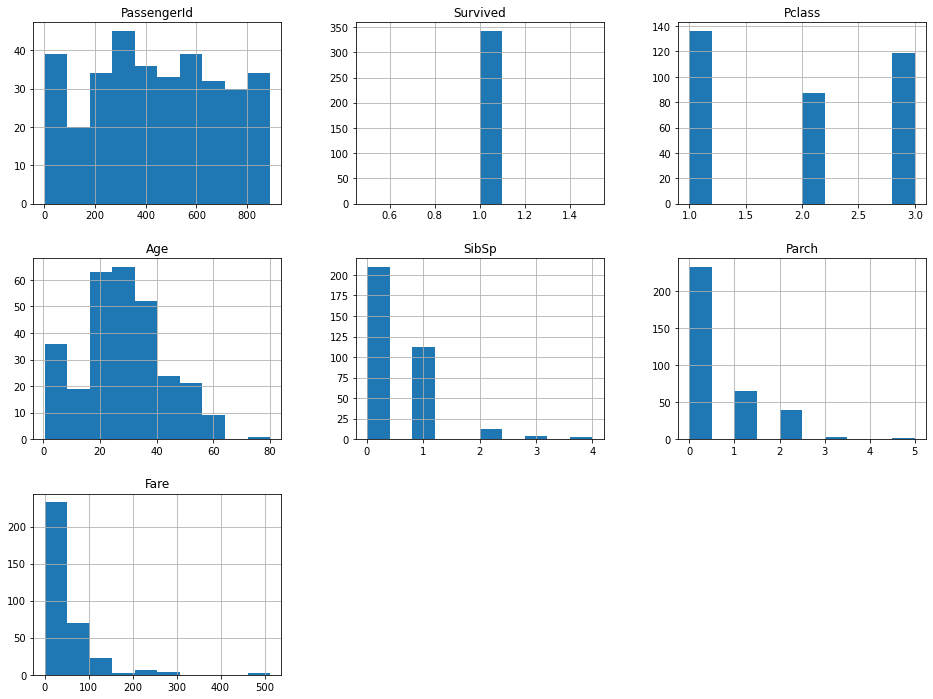

In [42]:
survived_passengers = titanic_data.loc[(titanic_data['Survived'] == 1)]
survived_passengers.hist(bins=10, figsize=(16,12))
plt.show()

In [21]:
print(len(survived_passengers.loc[(survived_passengers['Embarked'] == 'S')]))

217


In [22]:
survived_passengers['Fare'].sort_values(ascending=False)[:5]

258    512.3292
737    512.3292
679    512.3292
341    263.0000
88     263.0000
Name: Fare, dtype: float64

In [23]:
survived_passengers['Age'].median()

28.0

In [27]:
len(titanic_data['Name'].unique())

891

In [29]:
titanic_data['SibSp'].median()

0.0

<AxesSubplot:>

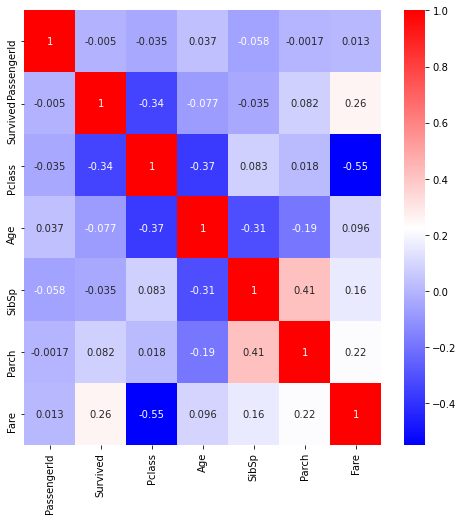

In [33]:
plt.figure(figsize=(8,8))

sbn.heatmap(titanic_data.corr(), cmap='bwr', annot=True)

In [ ]:
sbn.boxplot(titanic_data['Survived'], titanic_data['Name'], palette='GnBu_d')
plt.show()

In [ ]:
sbn.boxplot(titanic_data['Survived'], titanic_data['Ticket'], palette='GnBu_d')
plt.show()

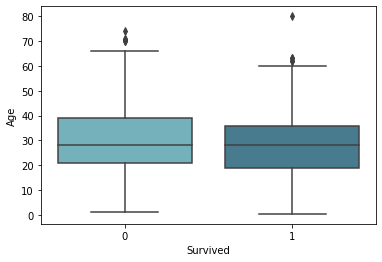

In [39]:
sbn.boxplot(titanic_data['Survived'], titanic_data['Age'], palette='GnBu_d')
plt.show()